In [1]:
#importando librerias
import pandas as pd
import numpy as np
import seaborn as sns
from pymongo import MongoClient

from Database import Airbnbs, Hosts, Airbnb_Details, Neighbourhoods, creating_engine, creating_session, closing_session

In [32]:
#Creating engine
#engine1 = creating_engine()

#Creating session
#session1 = creating_session(engine1)

## Proceso de Exploración

### Leemos el archivo como un dataframe usando pandas

In [2]:
df_airbnb=pd.read_csv("Airbnb_Open_Data.csv",  na_values=[''])
df_airbnb.head(2)

C:\Users\Guatavo\AppData\Local\Temp\ipykernel_4344\711940074.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb=pd.read_csv("Airbnb_Open_Data.csv",  na_values=[''])


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


### Se hacen ajustes a ciertas columnas con el fin de poder subir el csv a la base de datos 

In [3]:
#Usamos regrex para evitar los caracteres especiales y númericos
df_airbnb["NAME"] = df_airbnb["NAME"].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df_airbnb["house_rules"] = df_airbnb["house_rules"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
df_airbnb["host name"] = df_airbnb["host name"].str.replace(r'[^a-zA-Z\s]', '', regex=True)

#Dropeamos aquellas columnas que no aportan un valor signficante al código 
df_airbnb.drop(["license", "country", "country code"], axis=1, inplace=True)

#Quitamos los valores nulos del host name
df_airbnb["host name"].fillna("no provided") 

#Admitimos solo valores positivos para la columna minimum nights
df_airbnb["minimum nights"] = df_airbnb["minimum nights"].abs()

df_airbnb.to_csv("import.csv", encoding="utf-8", index=False)

## Conectarse a MongoDB

In [4]:
client = MongoClient('localhost', 27017)

# Seleccionar la base de datos y la colección
db = client['airbnb3']
collection = db['airbnb_collection3']


## Convertir el DataFrame en un formato que MongoDB pueda manejar 

In [6]:
records = df_airbnb.to_dict(orient='records')

# Insertar los registros en la colección
collection.insert_many(records)


## Consulta para recuperar todos los documentos de la colección y convertirlos en una lista


In [7]:
documents = list(collection.find({}))

# Crear un DataFrame a partir de la lista de documentos
df_airbnb = pd.DataFrame(documents)

# Cerrar la conexión a MongoDB
client.close()

In [8]:
df_airbnb

,_id,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,64f37253c71f97a2a90d1226,1001254,Clean quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way youd like ...
1,64f37253c71f97a2a90d1227,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,64f37253c71f97a2a90d1228,1002403,THE VILLAGE OF HARLEMNEW YORK,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,...,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,I encourage you to use my kitchen cooking and ...
3,64f37253c71f97a2a90d1229,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,...,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,64f37253c71f97a2a90d122a,1003689,Entire Apt Spacious StudioLoft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,...,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,Please no smoking in the house porch or on the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,64f37254c71f97a2a90ea2e8,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,...,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,64f37254c71f97a2a90ea2e9,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,...,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules Guests agree to the following term...
102596,64f37254c71f97a2a90ea2ea,6093542,Comfy bright room in Brooklyn,69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,...,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN
102597,64f37254c71f97a2a90ea2eb,6094094,Big StudioOne Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,...,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN


### ¿Qué tipo de dato son las variables del conjunto de datos?

In [9]:
df_airbnb.dtypes

_id                                object
id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                       

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [10]:
(
    df_airbnb
    .dtypes
    .value_counts()
)

object     13
float64     9
int64       2
dtype: int64

###  ¿Cuales son las dimensiones del Dataset?

In [11]:
df_airbnb.shape

(102599, 24)

### ¿Existen valores nulos explicitos en el conjunto de datos?

In [12]:
df_airbnb.isnull().any()

_id                               False
id                                False
NAME                               True
host id                           False
host_identity_verified             True
host name                          True
neighbourhood group                True
neighbourhood                      True
lat                                True
long                               True
instant_bookable                   True
cancellation_policy                True
room type                         False
Construction year                  True
price                              True
service fee                        True
minimum nights                     True
number of reviews                  True
last review                        True
reviews per month                  True
review rate number                 True
calculated host listings count     True
availability 365                   True
house_rules                        True
dtype: bool

### De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [13]:
(
    df_airbnb
    .isnull()
    .sum()
    .sort_values(ascending=False)
)


house_rules                       52131
last review                       15893
reviews per month                 15879
availability 365                    448
minimum nights                      409
host name                           406
review rate number                  326
calculated host listings count      319
host_identity_verified              289
service fee                         273
NAME                                250
price                               247
Construction year                   214
number of reviews                   183
instant_bookable                    105
cancellation_policy                  76
neighbourhood group                  29
neighbourhood                        16
long                                  8
lat                                   8
_id                                   0
id                                    0
host id                               0
room type                             0
dtype: int64

### ¿Cuál es la proporción de valores nulos por cada variable? 

C:\Users\Guatavo\anaconda3\envs\fundamentos-etl\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


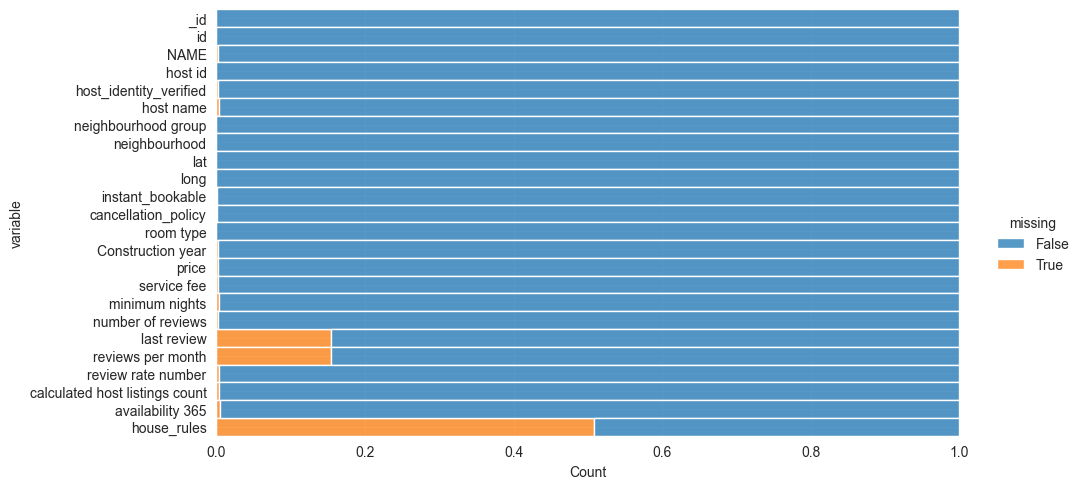

In [14]:
(
    df_airbnb
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [15]:
(
    df_airbnb
    .isnull()
    .sum()
    .sum()
)

87509

## Proceso de Limpieza 

#### Estandarizamos los nombres

In [16]:
new_column_names = [x.lower().replace(" ", "_") for x in df_airbnb.columns]
df_airbnb.columns = new_column_names

## Borrar columna que se creo usando mongo

In [18]:
df_airbnb = df_airbnb.drop(columns=['_id'])


#### Dado que el atributo de "host_identity_verified" cuenta con valores nulos, vamos a llenar dichos valores con unverified

In [19]:
df_airbnb["host_identity_verified"].fillna("unverified", inplace=True)
df_airbnb

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way youd like ...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEMNEW YORK,78829239556,unverified,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,I encourage you to use my kitchen cooking and ...
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt Spacious StudioLoft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,Please no smoking in the house porch or on the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,...,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,...,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules Guests agree to the following term...
102596,6093542,Comfy bright room in Brooklyn,69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,...,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN
102597,6094094,Big StudioOne Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,True,...,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN


#### Es necesario eliminar los símbolos de dólar de las columnas "price" y "service_fee"

In [20]:
df_airbnb["price"] = df_airbnb["price"].str.replace('$', '').str.replace(',', '').str.strip()
df_airbnb["service_fee"] = df_airbnb["service_fee"].str.replace('$', '').str.replace(',', '').str.strip()

# Convertir las columnas "price" y "service_fee" a valores flotantes
df_airbnb["price"] = df_airbnb["price"].astype(float)
df_airbnb["service_fee"] = df_airbnb["service_fee"].astype(float)

#Verificamos que no haya ningún registro en el que el service fee sea mayor al precio
counter = df_airbnb["price"] < df_airbnb["service_fee"]
count_greater_service_fee = counter.sum()
count_greater_service_fee

C:\Users\Guatavo\AppData\Local\Temp\ipykernel_4344\2542863133.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_airbnb["price"] = df_airbnb["price"].str.replace('$', '').str.replace(',', '').str.strip()
C:\Users\Guatavo\AppData\Local\Temp\ipykernel_4344\2542863133.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_airbnb["service_fee"] = df_airbnb["service_fee"].str.replace('$', '').str.replace(',', '').str.strip()


0

#### Limpia los valores no finitos en la columna "Construction year"

In [21]:
df_airbnb["construction_year"] = df_airbnb["construction_year"].replace([np.inf, -np.inf], np.nan)
df_airbnb["construction_year"] = df_airbnb["construction_year"].fillna(0)  # Rellenar valores nulos con 0 o el valor 

#### Cambiamos la columna "Construction year" de tipo float64 a int32, ya que los años son enteros.

In [22]:

df_airbnb["construction_year"] = df_airbnb["construction_year"].astype(int)

#### Reemplaza los valores nulos por 0 en las columnas "last review" y "reviews per month". Cuando la columna number of reviews es 0.

In [23]:
filtered_df = df_airbnb[df_airbnb["number_of_reviews"] == 0]
# Muestra los registros filtrados
print(filtered_df)

# Cuenta los valores nulos en la columna "last_review"
null_last_review = filtered_df["last_review"].isnull().sum()
# Cuenta los valores nulos en la columna "reviews_per_month"
null_reviews_per_month = filtered_df["reviews_per_month"].isnull().sum()

# Muestra los resultados
print("Registros nulos en last review:", null_last_review)
print("Registros nulos en reviews per month:", null_reviews_per_month)

             id                                              name  \
2       1002403                    THE VILLAGE OF HARLEMNEW YORK    
20      1012382                  Huge  BR Upper East  Cental Park   
27      1016248  Magnifique Suite au N de Manhattan  vue Cloitres   
37      1021771                       Clean and Quiet in Brooklyn   
39      1022876                         Country space in the city   
...         ...                                               ...   
102590  6090228                Wonderful artists loft in Brooklyn   
102592  6091333                   BR Ba in TriBeCa w outdoor deck   
102594  6092437                        Spare room in Williamsburg   
102596  6093542                     Comfy bright room in Brooklyn   
102598  6094647                                  sf Luxury Studio   

            host_id host_identity_verified host_name neighbourhood_group  \
2       78829239556             unverified     Elise           Manhattan   
20      79805143117

In [24]:
df_airbnb.loc[df_airbnb["number_of_reviews"] == 0, "last_review"] = 0
df_airbnb.loc[df_airbnb["number_of_reviews"] == 0, "reviews_per_month"] = 0

#### Remplazar los nulos de la columna house_rules 

In [25]:
df_airbnb["house_rules"] = df_airbnb["house_rules"].fillna("No se Especificaron Las Reglas")

In [26]:
df_airbnb

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way youd like ...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEMNEW YORK,78829239556,unverified,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,620.0,124.0,3.0,0.0,0,0.00,5.0,1.0,352.0,I encourage you to use my kitchen cooking and ...
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,No se Especificaron Las Reglas
4,1003689,Entire Apt Spacious StudioLoft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,Please no smoking in the house porch or on the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,...,844.0,169.0,1.0,0.0,0,0.00,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,...,837.0,167.0,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules Guests agree to the following term...
102596,6093542,Comfy bright room in Brooklyn,69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,...,988.0,198.0,3.0,0.0,0,0.00,5.0,1.0,342.0,No se Especificaron Las Reglas
102597,6094094,Big StudioOne Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,True,...,546.0,109.0,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,No se Especificaron Las Reglas


## these nulls will already be treated in the pure transformation phase and not in this EDA phase.

In [27]:
(
    df_airbnb
    .isnull()
    .sum()
    .sort_values(ascending=False)
)


availability_365                  448
minimum_nights                    409
host_name                         406
review_rate_number                326
calculated_host_listings_count    319
service_fee                       273
name                              250
price                             247
number_of_reviews                 183
last_review                       159
reviews_per_month                 145
instant_bookable                  105
cancellation_policy                76
neighbourhood_group                29
neighbourhood                      16
long                                8
lat                                 8
id                                  0
room_type                           0
construction_year                   0
host_identity_verified              0
host_id                             0
house_rules                         0
dtype: int64

### Creación de las dimensiones 

In [ ]:
neighbourhood_table = df_airbnb[["neighbourhood_group", "neighbourhood", "lat", "long"]]
neighbourhood_table.head(2)

In [ ]:
host_table = df_airbnb[["host_id", "host_name", "host_identity_verified"]]
host_table.head(2)

In [ ]:
airbnb_detail = df_airbnb[
    ["id", "name", "instant_bookable", 
     "cancellation_policy", "room_type", "construction_year", 
     "price", "service_fee", "minimum_nights", "number_of_reviews", 
     "last_review", "reviews_per_month", "review_rate_number", "calculated_host_listings_count", 
     "availability_365", "house_rules"]]

airbnb_detail.head(2)

### Transformaciones a la dimensión de Neighbourhoods

#### Agrupamos con el fin de no tener datos redundantes, calculando además promedio de latitud y longitud

In [ ]:
neighbourhood_table = neighbourhood_table.groupby(["neighbourhood_group", "neighbourhood"]).agg({
    "lat": "mean",
    "long": "mean"
}).reset_index()

#Creamos ID y reorganizamos columnas
neighbourhood_table["neighbourhood_id"] = range(1, len(neighbourhood_table) + 1)
column_order = ["neighbourhood_id", "neighbourhood_group", "neighbourhood", "lat", "long"]
neighbourhood_table = neighbourhood_table[column_order]

neighbourhood_table.head(2)

### Proceso de limpieza a nuestra tabla de hecho (df_airbnb)

In [ ]:
#Delete the following columns since we already set up diferent tables to save all the information related with neighbourhoods and hosts
df_airbnb.drop(
         ["id", "name", "instant_bookable", 
     "cancellation_policy", "room_type", "construction_year", 
     "price", "service_fee", "minimum_nights", "number_of_reviews", 
     "last_review", "reviews_per_month", "review_rate_number", 
     "calculated_host_listings_count", 
     "availability_365", "house_rules", "host_name", 
     "host_identity_verified", "lat", "long"], axis=1, inplace=True)

#### Se cambian las columnas neighbourhood_group y neighbourhood por un identificador númerico

In [ ]:
def get_neighbourhood_id(row):
    mask = (neighbourhood_table["neighbourhood_group"] == row["neighbourhood_group"]) & (neighbourhood_table["neighbourhood"] == row["neighbourhood"])
    matched_row = neighbourhood_table[mask]
    if not matched_row.empty:
        return matched_row["neighbourhood_id"].iloc[0]
    else:
        return None

# Aplicar la función para obtener "neighbourhood_id"
df_airbnb["neighbourhood_id"] = df_airbnb.apply(get_neighbourhood_id, axis=1)

#### Una vez asignados los IDs de forma númerica podemos prescindir de las columnas iniciales

In [ ]:
df_airbnb.drop(["neighbourhood_group", "neighbourhood"], axis=1, inplace=True)
df_airbnb

## Proceso de Carga

In [ ]:
#Creating engine
engine1 = creating_engine()

#Creating session
session1 = creating_session(engine1)